In [1]:
import os
os.chdir('/Users/asherlantz/Desktop/physics/FairSampling')
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt
import numpy as np
import tfim_sk_infd.services.entropy_service as tfe
import json

DB_PATH = 'database/fair_sampling.db'

In [22]:
# Establish a connection to the SQLite database
conn = sqlite3.connect(DB_PATH)

# Define your SQL query

query  = """

SELECT
	reduced_gs,
	post_anneal_gs_probs,
    disc_fair_sampling,
    disc_post_anneal
FROM
	instances_N16
WHERE
	degeneracy = 6
	AND disc_fair_sampling != disc_post_anneal
	AND post_anneal_od_mean < 0.99;

"""

# Execute the query and read the data into a pandas DataFrame
df = pd.read_sql_query(query, conn)

# Close the database connection
conn.close()

In [23]:
df

,reduced_gs,post_anneal_gs_probs,disc_fair_sampling,disc_post_anneal
0,"[2773, 10779, 27419]","[5.041066144179076e-19, 0.4369493287213091, 0....",8,2
1,"[11555, 12035, 27819]","[0.6122390808035086, 0.3876292682516396, 3.615...",6,2
2,"[19810, 27765, 28010]","[0.4124282615936495, 1.175740573183229e-18, 0....",7,2
3,"[13311, 23132, 31325]","[3.5971699881655575e-20, 0.49993050719108356, ...",8,2
4,"[10259, 10266, 27987]","[0.5126220341837552, 0.4872333380682265, 2.140...",6,2
5,"[24979, 29992, 32032]","[8.69060441563536e-28, 0.4539619330911335, 0.5...",9,2
6,"[18382, 20422, 23907]","[0.510407763225926, 0.48945379340533524, 2.856...",8,2
7,"[9134, 34792, 35816]","[5.664049129812124e-19, 0.587424656386356, 0.4...",7,2
8,"[1705, 3369, 3769]","[0.5172439356688613, 8.984346409627029e-10, 0....",5,2
9,"[3604, 2664, 7016]","[9.530240582441525e-20, 0.649694322927069, 0.3...",8,2


In [24]:

N = 16

for index in range(len(df)):
    print(index)

    instance = df.iloc[index]



    post_anneal_gs_amps = np.sqrt(np.array(json.loads(instance["post_anneal_gs_probs"])))
    post_anneal_gs_amps /= np.linalg.norm(post_anneal_gs_amps)
    reduced_gs = np.array(json.loads(instance["reduced_gs"]))

    
    disc_pa = instance["disc_post_anneal"]
    disc_array=[disc_pa]
    for i in [1,2]:
        disc_alt = tfe.disconnectivity(np.roll(post_anneal_gs_amps,i), reduced_gs, N )
        disc_array.append(disc_alt)
        if disc_alt < disc_pa:
            print("here!")
    
    
    print(disc_array)
    print("---------")


# tfe.disconnectivity(post_anneal_gs_amps, reduced_gs, N)
    

0
[2, 8, 6]
---------
1
[2, 6, 4]
---------
2
[2, 6, 6]
---------
3
[2, 6, 8]
---------
4
[2, 6, 4]
---------
5
[2, 8, 8]
---------
6
[2, 6, 8]
---------
7
[2, 6, 6]
---------
8
[2, 4, 4]
---------
9
[2, 8, 6]
---------
10
[2, 6, 4]
---------
11
[2, 6, 6]
---------
12
[2, 8, 6]
---------
13
[2, 6, 8]
---------
14
[4, 6, 6]
---------
15
[2, 6, 8]
---------
16
[2, 4, 4]
---------
17
[2, 4, 4]
---------
18
[2, 8, 8]
---------
19
[2, 4, 4]
---------
20
[2, 6, 8]
---------
21
[2, 6, 8]
---------
22
[2, 4, 6]
---------


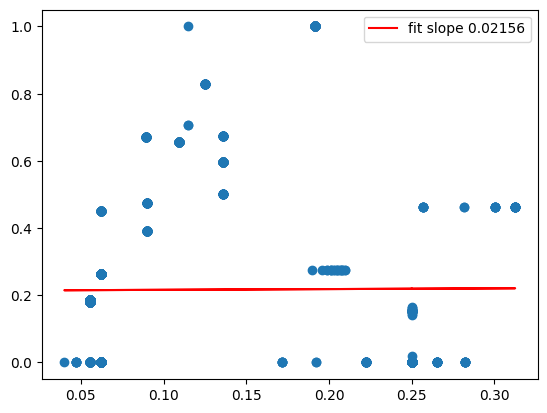

In [5]:
# Establish a connection to the SQLite database
conn = sqlite3.connect(DB_PATH)

# Define your SQL query

query  = """

SELECT seed, od_variance, post_anneal_supp_ratio FROM instances_N8
WHERE degeneracy > 2

"""

# Execute the query and read the data into a pandas DataFrame
df = pd.read_sql_query(query, conn)

# Close the database connection
conn.close()

plt.scatter(df["od_variance"], df["post_anneal_supp_ratio"])

# Fit line (linear regression)
# Using numpy's polyfit function to fit a line
slope, intercept = np.polyfit(df["od_variance"], df["post_anneal_supp_ratio"], 1)

# Calculate the predicted values
fit_line = slope * df["od_variance"] + intercept

# Plot the fit line
plt.plot(df["od_variance"], fit_line, color='red', label=f'fit slope {round(slope,5)}')

plt.legend()

plt.show()

In [25]:
# Establish a connection to the SQLite database
conn = sqlite3.connect(DB_PATH)

# Define your SQL query

query  = """

SELECT
	od_mean,
	od_variance,
	post_anneal_od_mean,
	post_anneal_od_variance
FROM
	instances_N16
WHERE
	od_mean > post_anneal_od_mean;

"""

# Execute the query and read the data into a pandas DataFrame
df2 = pd.read_sql_query(query, conn)

# Close the database connection
conn.close()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


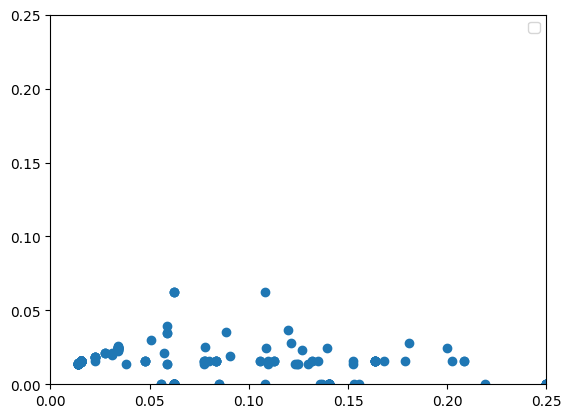

In [32]:
# Establish a connection to the SQLite database
conn = sqlite3.connect(DB_PATH)

# Define your SQL query

query  = """

SELECT
	od_mean,
	od_variance,
	post_anneal_od_mean,
	post_anneal_od_variance
FROM
	instances_N16


"""

# Execute the query and read the data into a pandas DataFrame
df = pd.read_sql_query(query, conn)

# Close the database connection
conn.close()

plt.scatter(df["od_variance"], df["post_anneal_od_variance"])

plt.xlim(0,0.25)
plt.ylim(0,0.25)

# Fit line (linear regression)
# Using numpy's polyfit function to fit a line
# slope, intercept = np.polyfit(df["od_variance"], df["post_anneal_od_variance"], 1)

# Calculate the predicted values
# fit_line = slope * df["od_variance"] + intercept

# Plot the fit line
# plt.plot(df["od_variance"], fit_line, color='red', label=f'fit slope {round(slope,5)}')



plt.legend()

plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


316


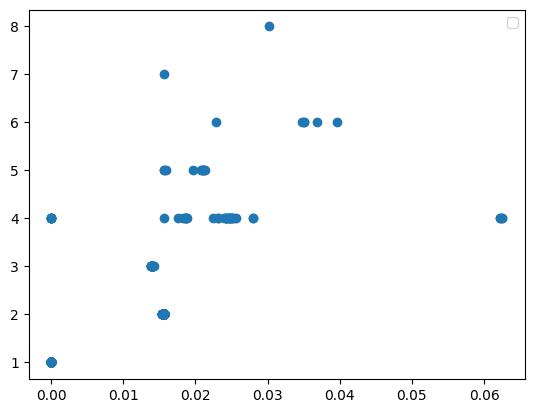

,od_mean,od_variance,post_anneal_od_mean,post_anneal_od_variance,disc_post_anneal
0,0.833333,0.013889,0.833677,1.393923e-02,3
1,0.875000,0.015625,0.876718,1.561641e-02,2
2,0.875000,0.015625,0.874870,1.562127e-02,2
3,0.875000,0.015625,0.878132,1.560984e-02,2
4,0.750000,0.062500,0.999901,1.019535e-08,1
...,...,...,...,...,...
311,0.875000,0.015625,0.875830,1.561988e-02,2
312,0.625000,0.078125,0.878954,1.560261e-02,4
313,0.875000,0.015625,0.878965,1.560263e-02,2
314,0.875000,0.015625,0.887825,1.544948e-02,2


In [38]:
# Establish a connection to the SQLite database
conn = sqlite3.connect(DB_PATH)

# Define your SQL query

query  = """

SELECT
	od_mean,
	od_variance,
	post_anneal_od_mean,
	post_anneal_od_variance,
	disc_post_anneal
FROM
	instances_N16
WHERE
	disc_post_anneal IS NOT NULL
	AND post_anneal_od_variance IS NOT NULL;



"""

# Execute the query and read the data into a pandas DataFrame
df = pd.read_sql_query(query, conn)

print(len(df))

# Close the database connection
conn.close()

plt.scatter(df["post_anneal_od_variance"], df["disc_post_anneal"])

# plt.xlim(0,0.25)
# plt.ylim(0,0.25)

# Fit line (linear regression)
# Using numpy's polyfit function to fit a line
# slope, intercept = np.polyfit(df["od_variance"], df["post_anneal_od_variance"], 1)

# Calculate the predicted values
# fit_line = slope * df["od_variance"] + intercept

# Plot the fit line
# plt.plot(df["od_variance"], fit_line, color='red', label=f'fit slope {round(slope,5)}')



plt.legend()

plt.show()
df

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


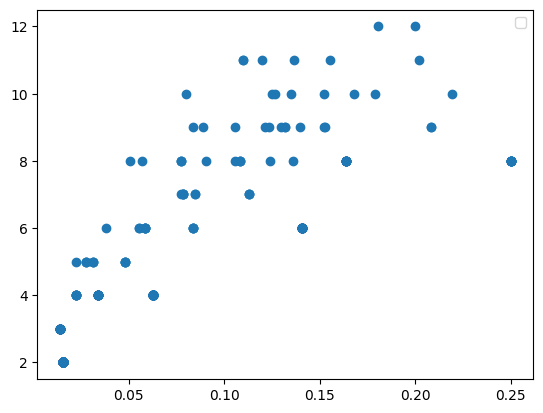

In [35]:
# Establish a connection to the SQLite database
conn = sqlite3.connect(DB_PATH)

# Define your SQL query

query  = """

SELECT
	od_mean,
	od_variance,
	post_anneal_od_mean,
	post_anneal_od_variance,
    disc_post_anneal,
    disc_fair_sampling
FROM
	instances_N16


"""

# Execute the query and read the data into a pandas DataFrame
df = pd.read_sql_query(query, conn)

# Close the database connection
conn.close()

plt.scatter(df["od_variance"], df["disc_fair_sampling"])

# plt.xlim(0,0.25)
# plt.ylim(0,0.25)

# Fit line (linear regression)
# Using numpy's polyfit function to fit a line
# slope, intercept = np.polyfit(df["od_variance"], df["post_anneal_od_variance"], 1)

# Calculate the predicted values
# fit_line = slope * df["od_variance"] + intercept

# Plot the fit line
# plt.plot(df["od_variance"], fit_line, color='red', label=f'fit slope {round(slope,5)}')



plt.legend()

plt.show()